In [1]:
import lasio
from class2 import facies_classification, Petrophysics, rename_columns, rearrange_columns

In [2]:
las = lasio.read('data/Freeman-004-ST1.las')
well1 = las.df()
well = well1.reset_index()

In [3]:
well.head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP
0,7564.5,2.2382,137.507,NaN,NaN,NaN
1,7565.0,2.2382,137.507,NaN,NaN,NaN
2,7565.5,2.2382,137.507,NaN,NaN,NaN
3,7566.0,2.2382,137.507,NaN,NaN,NaN
4,7566.5,2.2382,137.507,NaN,NaN,NaN


In [19]:
old_names = list(well.columns)
new_names = ['Depth', 'Density', 'Sonic', 'Gamma Ray', 'Neutron', 'Deep Resistivity']
df = rename_columns(well, old_names, new_names)

In [22]:
order = ['Depth', 'Gamma Ray', 'Deep Resistivity', 'Sonic', 'Density', 'Neutron']
data = rearrange_columns(df, order)

In [23]:
data.head()

,Depth,Gamma Ray,Deep Resistivity,Sonic,Density,Neutron
0,7564.5,NaN,NaN,137.507,2.2382,NaN
1,7565.0,NaN,NaN,137.507,2.2382,NaN
2,7565.5,NaN,NaN,137.507,2.2382,NaN
3,7566.0,NaN,NaN,137.507,2.2382,NaN
4,7566.5,NaN,NaN,137.507,2.2382,NaN


In [4]:
data['Facies'] = facies_classification(data['GR'])

In [5]:
data.head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,Facies
0,7564.5,2.2382,137.507,NaN,NaN,NaN,none
1,7565.0,2.2382,137.507,NaN,NaN,NaN,none
2,7565.5,2.2382,137.507,NaN,NaN,NaN,none
3,7566.0,2.2382,137.507,NaN,NaN,NaN,none
4,7566.5,2.2382,137.507,NaN,NaN,NaN,none


In [6]:
data['Facies'].unique()

array(['none', 'sand', 'shaly sand', 'shale'], dtype=object)

In [7]:
test = Petrophysics(data)

In [8]:
x = test.slowness_to_velocity(2)

In [9]:
data.head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,Facies,velocity
0,7564.5,2.2382,137.507,NaN,NaN,NaN,none,7272.357044
1,7565.0,2.2382,137.507,NaN,NaN,NaN,none,7272.357044
2,7565.5,2.2382,137.507,NaN,NaN,NaN,none,7272.357044
3,7566.0,2.2382,137.507,NaN,NaN,NaN,none,7272.357044
4,7566.5,2.2382,137.507,NaN,NaN,NaN,none,7272.357044


In [10]:
data.describe()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,velocity
count,7586.000000,7586.000000,7586.000000,7352.000000,7352.000000,7350.000000,7586.000000
mean,9460.750000,2.326999,118.441103,108.189529,0.423099,18.933387,8527.682849
std,1095.016952,0.081725,11.924260,23.541196,0.066108,176.943528,844.760010
min,7564.500000,1.863100,84.811200,32.593900,0.099500,0.081200,6307.620110
25%,8512.625000,2.272600,108.603500,101.771775,0.385175,0.878350,7762.524203
50%,9460.750000,2.342500,115.442700,112.463100,0.422200,1.025600,8662.306062
75%,10408.875000,2.390700,128.824075,120.219250,0.461400,1.368400,9207.806378
max,11357.000000,2.564600,158.538400,219.338000,0.656900,1950.000000,11790.895542


In [ ]:
# 1=sandstone  2=c_siltstone   3=f_siltstone 
# 4=marine_silt_shale 5=mudstone 6=wackestone 7=dolomite
# 8=packstone 9=bafflestone
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)

In [12]:
well.to_csv('data/freeman_well_4.csv', index=False)

In [27]:
import pandas as pd
df = pd.read_csv('data/freeman_well_4_perm.csv')
df.head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM
0,7564.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
1,7565.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
2,7565.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
3,7566.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
4,7566.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364


In [28]:
from class2 import facies_classification, Petrophysics
df['Facies'] = facies_classification(well['GR'])
df

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM,Facies
0,7564.5,2.2382,137.5070,NaN,NaN,NaN,0.2657,175.29364,none
1,7565.0,2.2382,137.5070,NaN,NaN,NaN,0.2657,175.29364,none
2,7565.5,2.2382,137.5070,NaN,NaN,NaN,0.2657,175.29364,none
3,7566.0,2.2382,137.5070,NaN,NaN,NaN,0.2657,175.29364,none
4,7566.5,2.2382,137.5070,NaN,NaN,NaN,0.2657,175.29364,none
...,...,...,...,...,...,...,...,...,...
7581,11355.0,2.3986,111.3281,162.1151,0.551,0.9417,0.1622,1.49274,shale
7582,11355.5,2.3986,111.3281,162.1151,0.551,0.9418,0.1622,1.49274,shale
7583,11356.0,2.3986,111.3281,162.1151,0.551,0.9418,0.1622,1.49274,shale
7584,11356.5,2.3986,111.3281,162.1151,0.551,0.9419,0.1622,1.49274,shale


In [29]:
test = Petrophysics(df)
x = test.slowness_to_velocity(2)

In [30]:
x.head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM,Facies,velocity
0,7564.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,none,7272.357044
1,7565.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,none,7272.357044
2,7565.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,none,7272.357044
3,7566.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,none,7272.357044
4,7566.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,none,7272.357044


In [31]:
x.to_csv('data/well_4_ML.csv', index=False)

In [32]:
data = pd.read_csv('data/well_4_ML.csv')

In [33]:
data.head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM,Facies,velocity
0,7564.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,none,7272.357044
1,7565.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,none,7272.357044
2,7565.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,none,7272.357044
3,7566.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,none,7272.357044
4,7566.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,none,7272.357044


# FEATURE ENGINEERING

Detecting outlier ussing Z Score method

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [2]:
df = pd.read_csv('data/freeman_well_4_perm.csv')
df.head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM
0,7564.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
1,7565.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
2,7565.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
3,7566.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
4,7566.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364


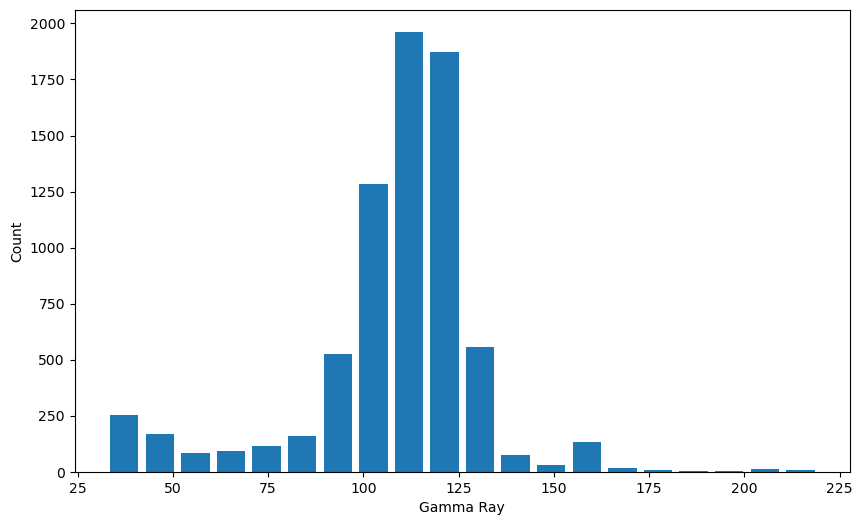

In [3]:
plt.hist(df.GR, bins=20, rwidth=0.8)
plt.xlabel('Gamma Ray')
plt.ylabel('Count')
plt.show()

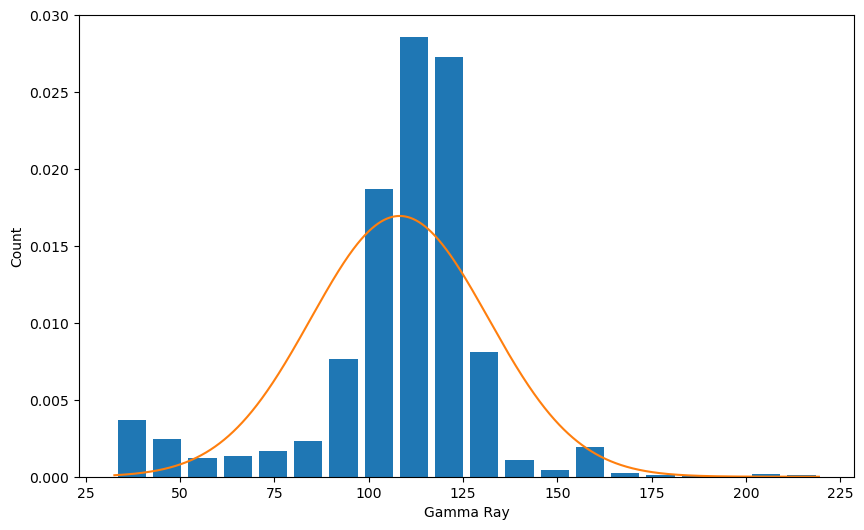

In [4]:
from scipy.stats import norm

plt.hist(df.GR, bins=20, rwidth=0.8, density=True)
plt.xlabel('Gamma Ray')
plt.ylabel('Count')

rng = np.arange(df.GR.min(), df.GR.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.GR.mean(),df.GR.std()))

In [5]:
df.GR.mean()

108.18952928454911

In [6]:
df.GR.std()

23.5411961087997

# Outlier detection and removal using Z Score

In [7]:
df['zscore'] = ( df.GR - df.GR.mean() ) / df.GR.std()
df.head(5)

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM,zscore
0,7564.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,NaN
1,7565.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,NaN
2,7565.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,NaN
3,7566.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,NaN
4,7566.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,NaN


In [8]:
df[df['zscore']>3].head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM,zscore
7422,11275.5,2.3811,112.0898,182.0136,0.4502,0.8267,0.1735,2.511657,3.135952
7423,11276.0,2.3959,112.4967,190.3772,0.4400,0.8160,0.1639,1.614287,3.491227
7424,11276.5,2.4047,112.7246,189.7021,0.4323,0.7965,0.1583,1.247362,3.462550
7425,11277.0,2.4081,113.5807,181.9346,0.4279,0.7820,0.1561,1.127190,3.132597
7426,11277.5,2.4042,113.2389,179.6507,0.4497,0.8000,0.1586,1.264712,3.035579


In [9]:
df[df['zscore']<-3].head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM,zscore
378,7753.5,2.2382,137.507,36.3887,0.6023,0.9332,0.2657,175.29364,-3.050008
379,7754.0,2.2382,137.507,33.2530,0.5853,0.9332,0.2657,175.29364,-3.183208
380,7754.5,2.2382,137.507,33.9191,0.6019,0.9332,0.2657,175.29364,-3.154913
384,7756.5,2.2382,137.507,35.6284,0.5703,0.9332,0.2657,175.29364,-3.082304
385,7757.0,2.2382,137.507,37.3668,0.5627,0.9332,0.2657,175.29364,-3.008459


In [10]:
df[(df.zscore<-3) | (df.zscore>3)].head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM,zscore
378,7753.5,2.2382,137.507,36.3887,0.6023,0.9332,0.2657,175.29364,-3.050008
379,7754.0,2.2382,137.507,33.2530,0.5853,0.9332,0.2657,175.29364,-3.183208
380,7754.5,2.2382,137.507,33.9191,0.6019,0.9332,0.2657,175.29364,-3.154913
384,7756.5,2.2382,137.507,35.6284,0.5703,0.9332,0.2657,175.29364,-3.082304
385,7757.0,2.2382,137.507,37.3668,0.5627,0.9332,0.2657,175.29364,-3.008459


In [11]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM,zscore
234,7681.5,2.2382,137.507,39.0321,0.5983,NaN,0.2657,175.29364,-2.937719
235,7682.0,2.2382,137.507,39.0321,0.5983,NaN,0.2657,175.29364,-2.937719
236,7682.5,2.2382,137.507,39.0321,0.5983,0.9332,0.2657,175.29364,-2.937719
237,7683.0,2.2382,137.507,39.0321,0.5983,0.9332,0.2657,175.29364,-2.937719
238,7683.5,2.2382,137.507,39.0321,0.5983,0.9332,0.2657,175.29364,-2.937719


In [12]:
df_no_outliers.shape

(7288, 9)

In [13]:
df.shape

(7586, 9)

In [25]:
tops = ('Lower Pliocene', 'Upper Miocene', 'MFS 5.0', 'Top Upper Miocene', 'MFS 6.0', 'MFS 7.4', 'Middle Miocene',
            'MFS 9.5', 'Top Middl Miocene')
tops_depths = (1508.76, 1889.76, 1954.92, 2094.59, 2182.99, 2349.8, 2559.63, 2620.07, 2674.83)

In [26]:
# Create the figure and subplots
def triple_combo_plot(top_depth,bottom_depth):
    
    logs=df[(df.DEPT >= top_depth) & (df.DEPT <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,10), sharey=True)
    fig.suptitle("Well Composite", fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)

#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        for (i,j) in zip(tops_depths,tops):
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=0.5, color='black')
                axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')
    
        
#1st track: GR, CALI, SP track
    
#    ax01=ax[0].twiny()
#    ax01.set_xlim(-100,10)
#    ax01.spines['top'].set_position(('outward',0))
#    ax01.set_xlabel("SP [mV]")
#    ax01.plot(logs.SP, logs.DEPT, label='SP[mV]', color='blue')
#    ax01.set_xlabel('SP[mV]',color='blue')    
#    ax01.tick_params(axis='x', colors='blue')
#    ax01.grid(True)
    
    
#    ax02=ax[0].twiny()
#    ax02.set_xlim(6,36)
#    ax02.plot(logs.CALI, logs.DEPT, '--', label='CALN[in]', color='black') 
#    ax02.spines['top'].set_position(('outward',40))
#    ax02.set_xlabel('CALI[in]',color='black')    
#    ax02.tick_params(axis='x', colors='black')
    
    ax03=ax[0].twiny()
    ax03.set_xlim(0,150)
    ax03.plot(logs.GR, logs.DEPT, label='GR[api]', color='green') 
    ax03.spines['top'].set_position(('outward',80))
    ax03.set_xlabel('GR[api]',color='green')    
    ax03.tick_params(axis='x', colors='green')
    
#2nd track: Resistivities

    ax11=ax[1].twiny()
    ax11.set_xlim(0.2,200)
    ax11.set_xscale('log')
    ax11.grid(True)
    ax11.spines['top'].set_position(('outward',80))
    ax11.set_xlabel('ILD[m.ohm]', color='red')
    ax11.plot(logs.RES_DEP, logs.DEPT, label='ILD[m.ohm]', color='red')
    ax11.tick_params(axis='x', colors='red')    
    
#    ax12=ax[1].twiny()
#    ax12.set_xlim(0.1,100)
#    ax12.set_xscale('log')
#    ax12.plot(logs.ILM, logs.DEPT, label='ILM[m.ohm]', color='purple') 
#    ax12.spines['top'].set_position(('outward',40))
#    ax12.set_xlabel('ILM[m.ohm]', color='purple')    
#    ax12.tick_params(axis='x', colors='purple')
    
        
#    ax13=ax[1].twiny()
#    ax13.set_xlim(0.1,100)
#    ax13.set_xscale('log')
#    ax13.plot(logs.LL8, logs.DEPT, '--',label='LL8[m.ohm]', color='black') 
#    ax13.spines['top'].set_position(('outward',0))
#    ax13.set_xlabel('LL8[m.ohm]',color='black')
#    ax13.tick_params(axis='x', colors='black')

    
#3rd track: RHOB, NPHI track
    
    ax21=ax[2].twiny()
    ax21.grid(True)
    ax21.set_xlim(140,40)
    ax21.spines['top'].set_position(('outward',0))
    ax21.set_xlabel('DT[us/ft]')
    ax21.plot(logs.DT, logs.DEPT, label='DT[us/ft]', color='blue')
    ax21.set_xlabel('DT[us/ft]', color='blue')    
    ax21.tick_params(axis='x', colors='blue')
    
    ax22=ax[2].twiny()
    ax22.set_xlim(-15,45)
    ax22.invert_xaxis()
    ax22.plot(logs.NEUT, logs.DEPT, label='NPHI[%]', color='green') 
    ax22.spines['top'].set_position(('outward',40))
    ax22.set_xlabel('NPHI[%]', color='green')    
    ax22.tick_params(axis='x', colors='green')
    
    ax23=ax[2].twiny()
    ax23.set_xlim(1.95,2.95)
    ax23.plot(logs.DEN, logs.DEPT ,label='RHOB[g/cc]', color='red') 
    ax23.spines['top'].set_position(('outward',80))
    ax23.set_xlabel('RHOB[g/cc]',color='red')
    ax23.tick_params(axis='x', colors='red')
    

#3rd track: DT track

    
    #plt.savefig ('triple_combo_plot.png', dpi=200, format='png')

In [27]:
#%matplotlib nbagg

triple_combo_plot(data.DEPT.min(),data.DEPT.max())

AttributeError: 'DataFrame' object has no attribute 'DEPT'